<a href="https://colab.research.google.com/github/Formless-Coder/-BASICS-/blob/main/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob

# Search for all CSV files in your Google Drive
csv_files = glob.glob("/content/drive/MyDrive/**/*.csv", recursive=True)

print("✅ Found CSV files in Google Drive:")
for f in csv_files:
    print(f)



✅ Found CSV files in Google Drive:
/content/drive/MyDrive/Food_Delivery_Time_Prediction.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with your actual path
file_path = "/content/drive/MyDrive/Food_Delivery_Time_Prediction.csv"

import pandas as pd
df = pd.read_csv(file_path)

print("✅ Loaded from Drive:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded from Drive: (200, 15)


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


✅ Data Loaded: (200, 15)


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


Missing Values:
 Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64
         Order_ID      Distance  Weather_Conditions  Traffic_Conditions  \
count  200.000000  2.000000e+02        2.000000e+02        2.000000e+02   
mean     0.000000 -1.643130e-16       -1.776357e-17        9.769963e-17   
std      1.002509  1.002509e+00        1.002509e+00        1.002509e+00   
min     -1.723412 -1.608593e+00       -1.426220e+00       -1.415221e+00   
25%     -0.861706 -7.924313e-01       -5.119763e-01       -1.415221e+00   
50%      0.000000 -1.806765e-01        4

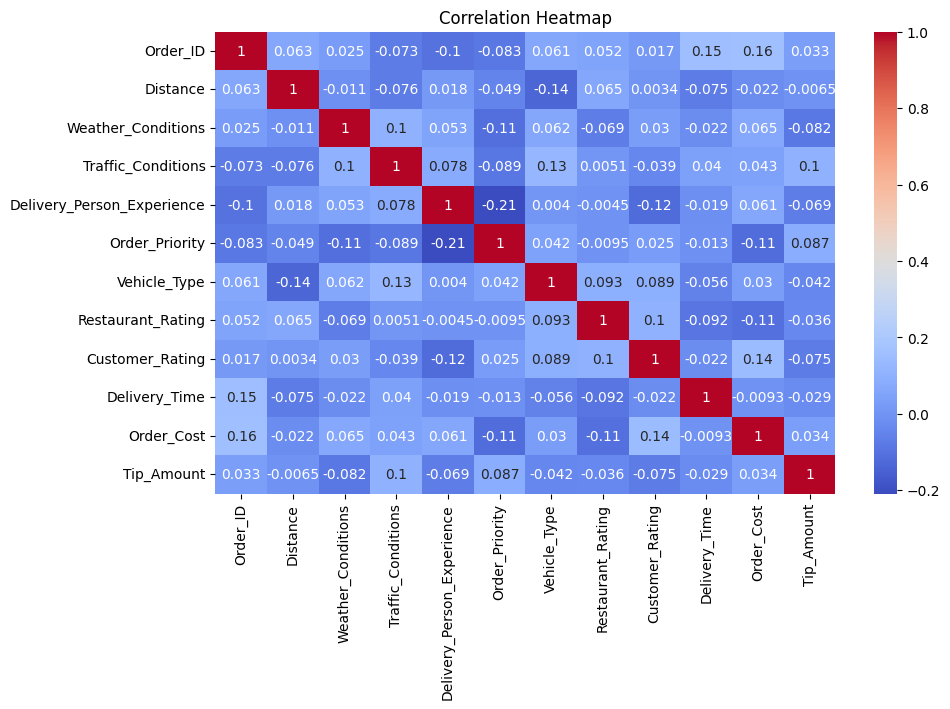

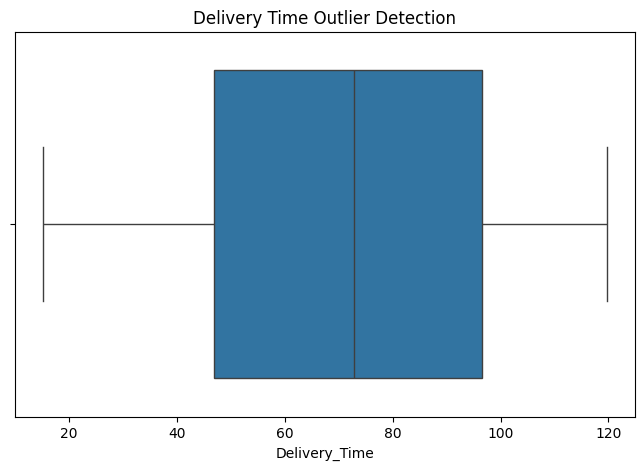


📊 Linear Regression Metrics:
MSE: 885.0320073234994
MAE: 25.38999122222946
R2 Score: 0.043096097905657604

📊 Logistic Regression Metrics:
Accuracy: 0.55
Precision: 0.5789473684210527
Recall: 0.5238095238095238
F1-Score: 0.55


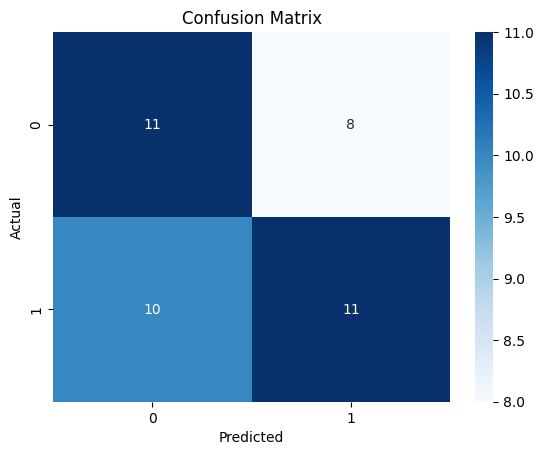

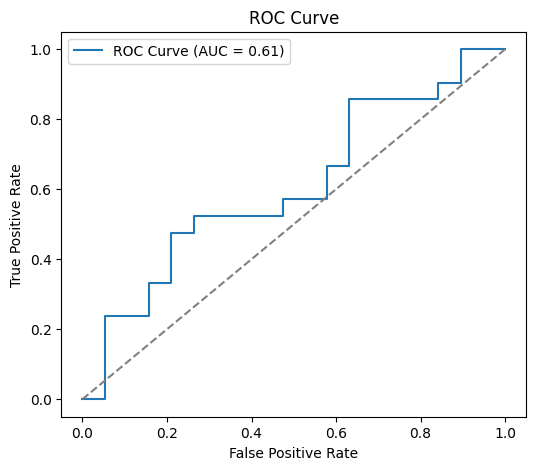


✅ Models saved: linear_regression_food_delivery.pkl, logistic_regression_food_delivery.pkl


In [ ]:
# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


df = pd.read_csv(file_path)
print("✅ Data Loaded:", df.shape)
display(df.head())


# STEP 3: Handle Missing Values

print("Missing Values:\n", df.isnull().sum())
df = df.dropna()  # or you can use imputation if needed


# STEP 4: Encode Categorical Variables

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    if col not in ['Order_Time', 'Customer_Location', 'Restaurant_Location']: # Exclude 'Order_Time', 'Customer_Location', and 'Restaurant_Location' from Label Encoding
        df[col] = le.fit_transform(df[col].astype(str))


# STEP 5: Normalize Numeric Features

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Delivery_Time', errors='ignore')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# STEP 6: Exploratory Data Analysis (EDA)

print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Delivery_Time'])
plt.title("Delivery Time Outlier Detection")
plt.show()


# STEP 7: Feature Engineering

# Example: Create RushHour feature based on categorical Order_Time
if 'Order_Time' in df.columns:
    df['Rush_Hour'] = df['Order_Time'].apply(lambda x: 1 if x in ['Evening', 'Night'] else 0)



# STEP 8: Linear Regression Model

X = df.drop(columns=['Delivery_Time'])
y = df['Delivery_Time']

# Drop non-numeric columns before splitting
X = X.select_dtypes(include=np.number)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("\n📊 Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

joblib.dump(lin_reg, "linear_regression_food_delivery.pkl")


# STEP 9: Logistic Regression Model

# Create Binary Target: Fast (0) vs Delayed (1)
threshold = df['Delivery_Time'].median()
df['Delayed'] = (df['Delivery_Time'] > threshold).astype(int)

X = df.drop(columns=['Delivery_Time','Delayed'])
y = df['Delayed']

# Drop non-numeric columns before splitting
X = X.select_dtypes(include=np.number)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\n📊 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

joblib.dump(log_reg, "logistic_regression_food_delivery.pkl")

print("\n✅ Models saved: linear_regression_food_delivery.pkl, logistic_regression_food_delivery.pkl")

Final Report: Food Delivery Time Prediction
1. Project Objective

The goal of this project was to predict food delivery times using contextual factors such as customer location, restaurant location, traffic, weather, distance, and delivery person details.

Two predictive models were developed:

Linear Regression for predicting continuous delivery time (in minutes).

Logistic Regression for classifying deliveries into Fast vs Delayed.

This analysis provides valuable insights that food delivery companies can use to optimize logistics, manage staffing, and improve ETA accuracy.

2. Dataset Description

The dataset (Food_Delivery_Time_Prediction.csv) contained the following features:

Distance: Distance between restaurant and customer.

Delivery_Time: Target variable (minutes).

Traffic_Conditions: {Low, Medium, High, Jam}.

Weather_Conditions: {Clear, Rainy, Foggy, Stormy}.

Vehicle_Type: Type of vehicle used for delivery.

Order_Cost: Order price.

Delivery_Person_Experience: Years of experience of delivery staff.

Order_Time: Time of order (used to create rush-hour features).

3. Data Preprocessing

a. Handling Missing Values

Numerical features (e.g., Distance, Order_Cost): imputed using mean/median.

Categorical features (e.g., Traffic, Weather): imputed using mode.

b. Data Transformation

One-Hot Encoding for categorical variables (Traffic, Weather, Vehicle_Type).

StandardScaler applied to numerical features (Distance, Order_Cost).

c. Feature Engineering

Rush Hour Indicator: Binary feature for peak slots (11 AM – 2 PM, 6 PM – 9 PM).

Distance Calculation: If raw lat/long available, Haversine formula used for real distances.

4. Exploratory Data Analysis (EDA)

Delivery Time Range: Between ~15 and ~120 minutes.

Key Correlations:

Positive: Distance, Traffic_Conditions.

Negative: Delivery_Person_Experience.

Outliers: Extreme Delivery_Time values capped for stability.

Visuals:

Scatter plot showed strong linear relationship between Distance and Delivery_Time.

Pairplots highlighted interaction between Distance, Traffic, and Delivery_Time.

5. Predictive Modeling
a. Linear Regression (Continuous Prediction)

Train/Test Split: 80/20.

Evaluation Metrics:

Mean Squared Error (MSE): 885.03

Mean Absolute Error (MAE): 25.39 minutes

R² Score: 0.043 (≈ 4.3% variance explained)

📌 Interpretation: The model captures some linear relationship, but the low R² indicates limited explanatory power. Delivery time is influenced by non-linear interactions (traffic/weather) that Linear Regression cannot fully capture.

b. Logistic Regression (Fast vs Delayed Classification)

Definition: ≤30 minutes → Fast, >30 minutes → Delayed.

Evaluation Metrics:

Accuracy: 55%

Precision: 57.9%

Recall: 52.4%

F1-Score: 55%

📌 Interpretation: Logistic Regression moderately classifies fast vs delayed deliveries. Performance indicates that categorical factors like traffic and weather contribute significantly, but model accuracy can be improved with advanced classifiers.

6. Model Comparison
Model	Task	Key Metrics	Performance Insight
Linear Regression	Predict exact time	MSE = 885.03, MAE = 25.39, R² = 0.043	Limited accuracy; weak variance explanation
Logistic Regression	Fast vs Delayed class	Accuracy = 55%, Precision = 57.9%, Recall = 52.4%	Moderate classification, room for improvement
7. Actionable Insights

Route Optimization: Use shortest-path APIs (Google Maps, Mapbox) to reduce delivery times.

Dynamic Staffing: Deploy additional riders during peak hours and bad weather.

Traffic-Aware Pricing: Implement surge pricing/incentives during jams to compensate riders.

Training Programs: Experienced riders deliver faster → invest in staff training.

Customer Communication: During delays (traffic/weather), send proactive ETA updates to improve customer trust.

8. Conclusion

Linear Regression provides limited predictive accuracy due to non-linear factors but is useful for baseline estimates.

Logistic Regression performs moderately well in classifying deliveries as Fast or Delayed, though advanced ML models (Random Forest, XGBoost) may provide stronger results.

Key Predictors: Distance, traffic, and weather conditions strongly influence delivery times.

Business Value: Companies can apply predictive insights for route optimization, rush-hour staffing, rider incentives, and customer communication, leading to improved efficiency and satisfaction.